In [7]:


#  Step 1: Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style='whitegrid')


In [8]:
#  Step 2: Load the Dataset

# Make sure the file is in the correct path (e.g., same folder or a data/ folder)
df = pd.read_csv(r"..\data\Sample_ Superstore.csv")
df.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11-08-2016,11-11-2016,Second Class,CG-12520,Consumer,United States,Henderson,Kentucky,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,06-12-2016,6/16/2016,Second Class,DV-13045,Corporate,United States,Los Angeles,California,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10-11-2015,10/18/2015,Standard Class,SO-20335,Consumer,United States,Fort Lauderdale,Florida,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [9]:
# Step 3: Data Cleaning & Feature Engineering

# Remove duplicates
df.drop_duplicates(inplace=True)

# Convert date columns with errors='coerce'
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

# Check for invalid dates (NaT values)
invalid_order_dates = df[df['Order Date'].isna()]
invalid_ship_dates = df[df['Ship Date'].isna()]
print("Invalid Order Dates:", invalid_order_dates)
print("Invalid Ship Dates:", invalid_ship_dates)

# Remove rows with invalid dates
df = df.dropna(subset=['Order Date', 'Ship Date'])

# Create time-based features
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()
df['Month_Num'] = df['Order Date'].dt.month

# Quick check
df.info()


Invalid Order Dates:       Row ID        Order ID Order Date  Ship Date       Ship Mode  \
12        13  CA-2017-114412        NaT        NaT  Standard Class   
14        15  US-2015-118983        NaT        NaT  Standard Class   
15        16  US-2015-118983        NaT        NaT  Standard Class   
17        18  CA-2014-167164        NaT        NaT    Second Class   
18        19  CA-2014-143336        NaT 2014-09-01    Second Class   
...      ...             ...        ...        ...             ...   
9988    9989  CA-2017-163629        NaT        NaT  Standard Class   
9989    9990  CA-2014-110422        NaT        NaT    Second Class   
9990    9991  CA-2017-121258        NaT 2017-03-03  Standard Class   
9991    9992  CA-2017-121258        NaT 2017-03-03  Standard Class   
9992    9993  CA-2017-121258        NaT 2017-03-03  Standard Class   

     Customer ID      Segment        Country           City           State  \
12      AA-10480     Consumer  United States        Concord

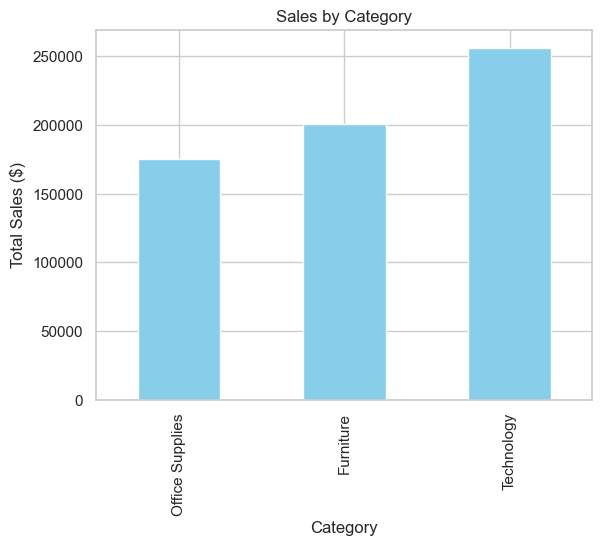

In [10]:
#  Step 4: Sales by Category

category_sales = df.groupby('Category')['Sales'].sum().sort_values()
category_sales.plot(kind='bar', title='Sales by Category', color='skyblue')
plt.ylabel('Total Sales ($)')
plt.xlabel('Category')
plt.savefig('../images/sales_by_category.png', bbox_inches='tight')
plt.show()


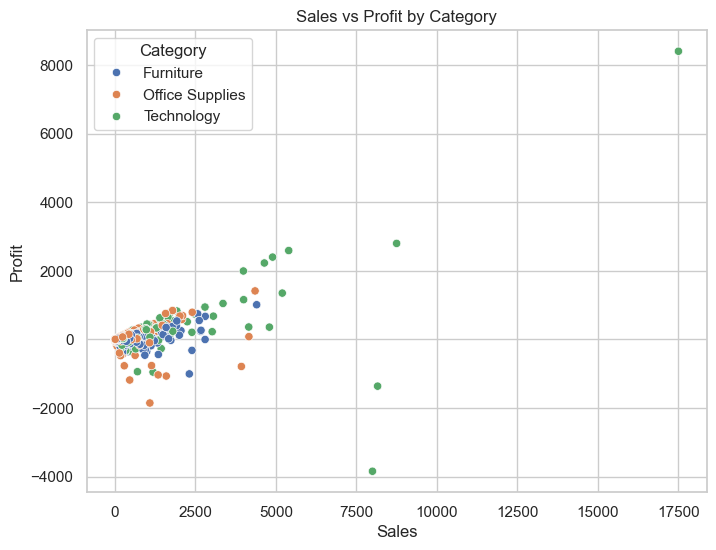

In [11]:
#  Step 5: Sales vs Profit Scatter Plot

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Category')
plt.title('Sales vs Profit by Category')
plt.savefig('../images/sales_vs_profit_by_category.png', bbox_inches='tight')
plt.show()


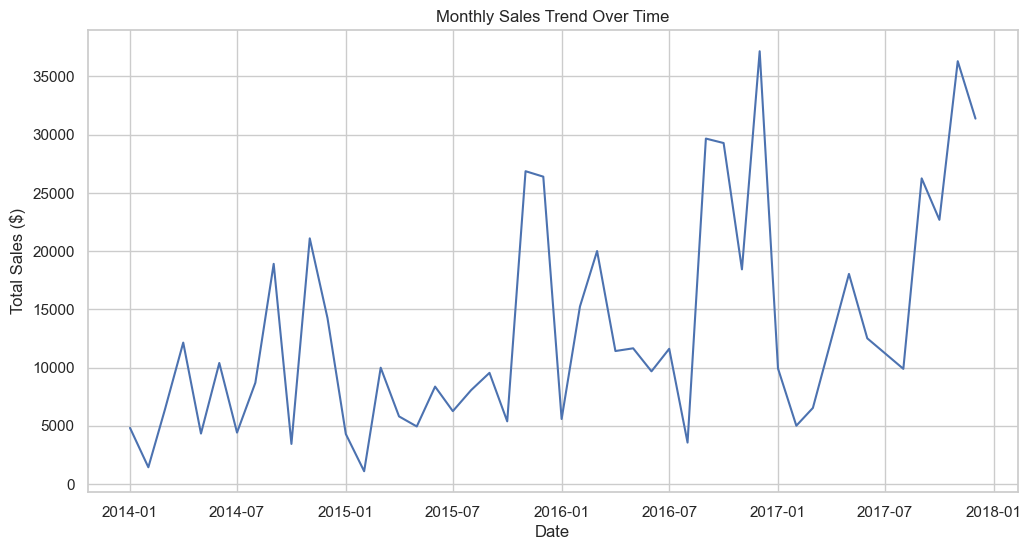

In [12]:
#Step 6: Monthly Sales Trend

monthly_sales = df.groupby(['Year', 'Month_Num'])['Sales'].sum().reset_index()
monthly_sales = monthly_sales.sort_values(['Year', 'Month_Num'])
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month_Num'].astype(str))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_sales, x='Date', y='Sales')
plt.title('Monthly Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales ($)')
plt.savefig('../images/monthly_sales_trend.png', bbox_inches='tight')
plt.show()


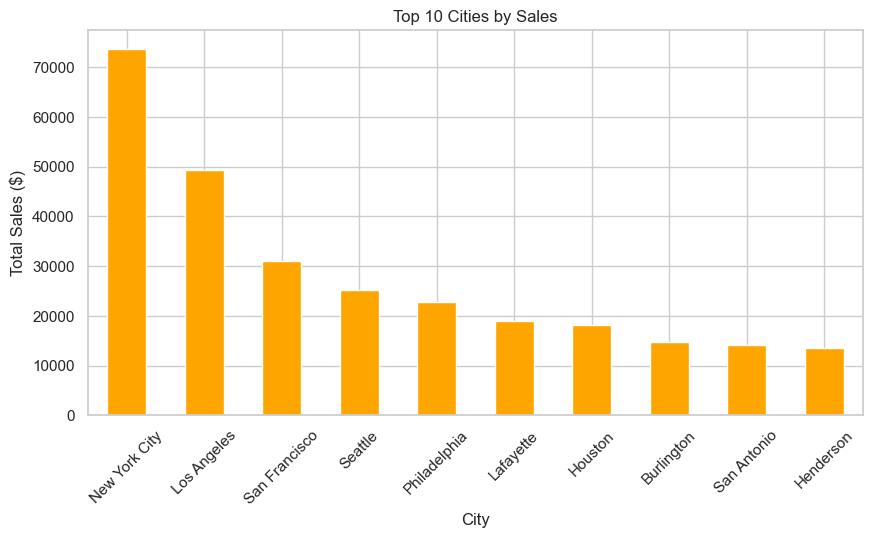

In [13]:
# Step 7: Top 10 Cities by Sales

top_cities = df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 5))
top_cities.plot(kind='bar', color='orange')
plt.title('Top 10 Cities by Sales')
plt.ylabel('Total Sales ($)')
plt.xlabel('City')
plt.xticks(rotation=45)
plt.savefig('../images/top10_cities_by_sales.png', bbox_inches='tight')
plt.show()


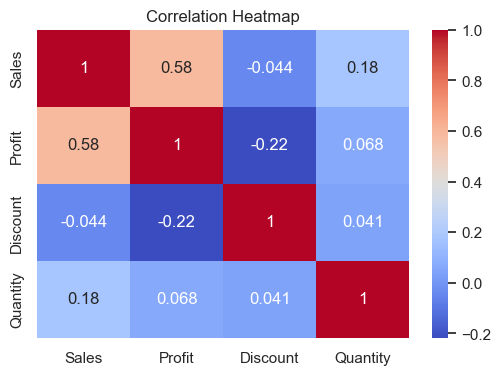

In [14]:
#  Step 8: Correlation Heatmap

plt.figure(figsize=(6, 4))
sns.heatmap(df[['Sales', 'Profit', 'Discount', 'Quantity']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('../images/correlation_heatmap.png', bbox_inches='tight')
plt.show()


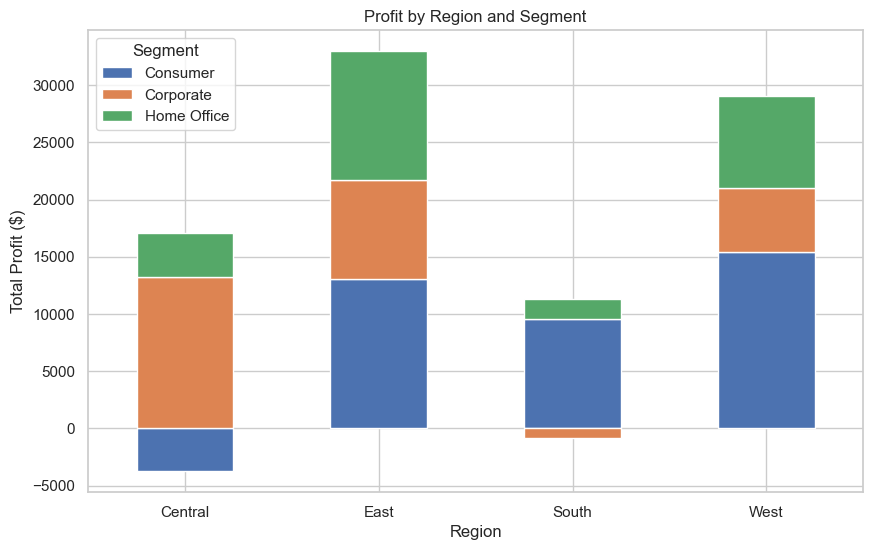

In [15]:
#  Step 9: Region vs Segment Profit Analysis

region_segment_profit = df.groupby(['Region', 'Segment'])['Profit'].sum().unstack()

region_segment_profit.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Profit by Region and Segment')
plt.ylabel('Total Profit ($)')
plt.xlabel('Region')
plt.xticks(rotation=0)
plt.savefig('../images/profit_by_region_segment.png', bbox_inches='tight')
plt.show()


In [16]:
# Step 10 (Optional): Export the Cleaned Dataset

df.to_csv(r"..\outputData\SampleSuperstore_Cleaned.csv", index=False)
